In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Blank Image


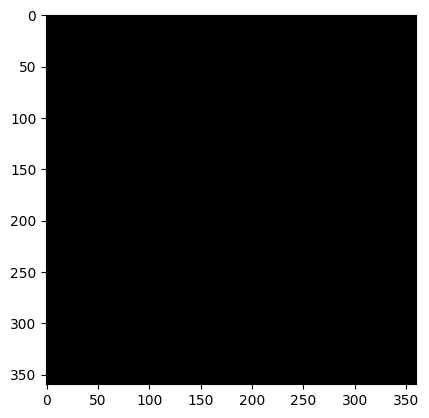

In [2]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

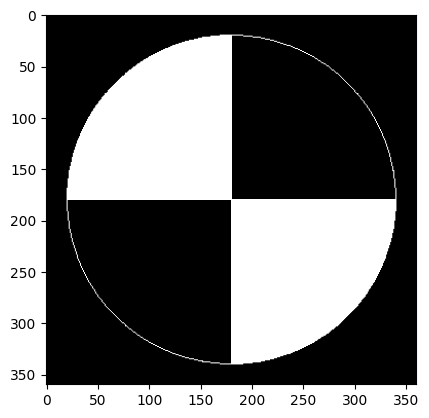

In [3]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

Laplacian map


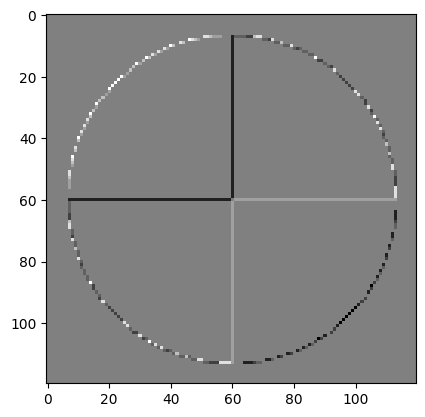

absolute Laplacian map


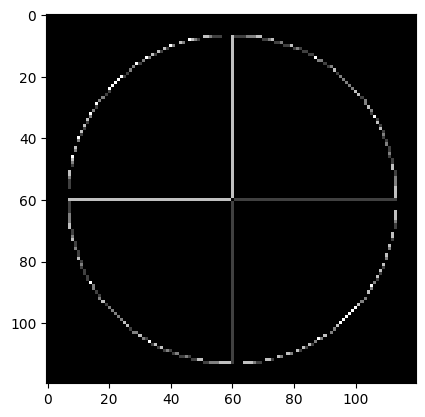

In [5]:
laplacian_map = np.zeros(((int)(IMG_DIMS[0]//3), (int)(IMG_DIMS[0]//3)))

variances = []
for x in range(0, IMG_DIMS[0]//3):
    for y in range(0, IMG_DIMS[1]//3):
        i = x * 3
        j = y * 3
        laplacian_map[x, y] = (image[i+1, j+1] * 4 - image[i+1,j] - image[i-1, j] - image[i, j + 1] - image[i, j - 1])

print('Laplacian map')
plt.imshow(laplacian_map, cmap='gray')
plt.show()

print('absolute Laplacian map')
plt.imshow(abs(laplacian_map), cmap='gray')
plt.show()